In [1]:
!python3 --version

Python 3.11.13


In [2]:
!pip uninstall -y numpy pandas pycaret

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2


In [1]:
!pip install numpy==1.24.4 pandas==2.0.3

In [4]:
import numpy, pandas, sklearn
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("sklearn:", sklearn.__version__)

numpy: 1.24.4
pandas: 2.0.3
sklearn: 1.6.1


In [5]:
!pip install pycaret==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 7.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 120.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 166.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.

In [2]:
import pandas as pd
import numpy as np
from pycaret.classification import setup

## Upload Files

Use https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv and https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=test.csv to download the files, and then upload in the next cell.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [3]:
!ls /content/

 logs.log   sample_data  'Wholesale customers data.csv'


## Load the data and perform quick cleaning

In [5]:
import pandas as pd
import numpy as np

# Use the file from Kaggle or your uploaded file name
csv_path = "/content/Wholesale customers data.csv"
df_raw = pd.read_csv(csv_path)

# Basic shape and peek
print(df_raw.shape)
df_raw.head(3)

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [6]:
df = df_raw.copy()
df.columns = [c.strip().replace(" ", "_") for c in df.columns]
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [7]:
num_df = df.select_dtypes(include=[np.number]).copy()
print(num_df.shape)
num_df.head(3)


(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


PyCaret Clustering — setup

In [8]:
from pycaret.clustering import *

exp = setup(
    data=num_df,
    session_id=42,
    normalize=True,
    transformation=False,
    ignore_features=None,
)


,Description,Value
0,Session id,42
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


Start with K-Means and explore K

In [9]:
kmeans = create_model('kmeans')  # default k (e.g., 4)
kmeans


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3482,130.9179,1.2359,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=4, random_state=42)

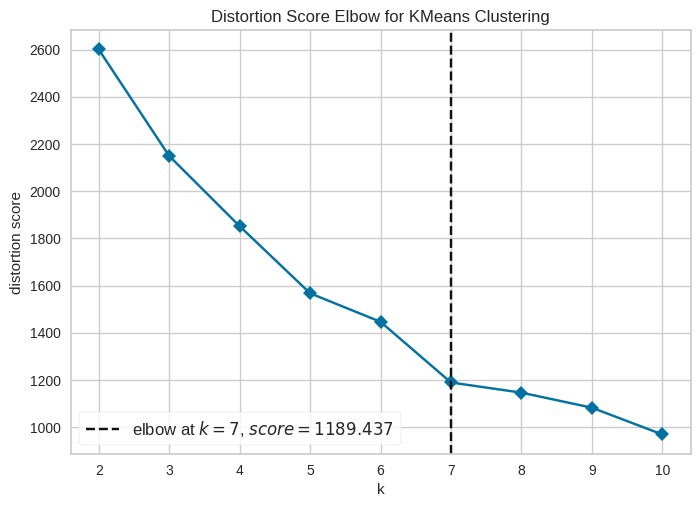

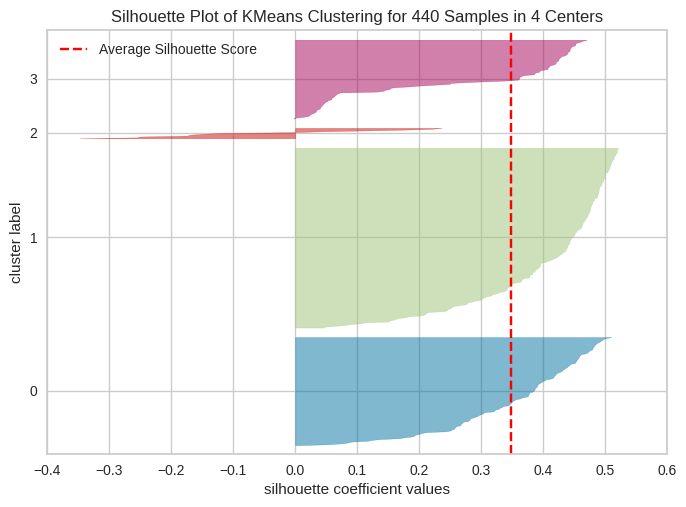

In [10]:
plot_model(kmeans, plot='elbow')       # inertia vs. k
plot_model(kmeans, plot='silhouette')  # average silhouette score


In [15]:
from pycaret.clustering import ClusteringExperiment
ClusteringExperiment()._available_plots  # private attr, but handy for debugging


{'pipeline': 'Pipeline Plot',
 'cluster': 't-SNE (3d) Dimension Plot',
 'tsne': 'Cluster t-SNE (3d)',
 'elbow': 'Elbow Plot',
 'silhouette': 'Silhouette Plot',
 'distance': 'Distance Plot',
 'distribution': 'Distribution Plot'}

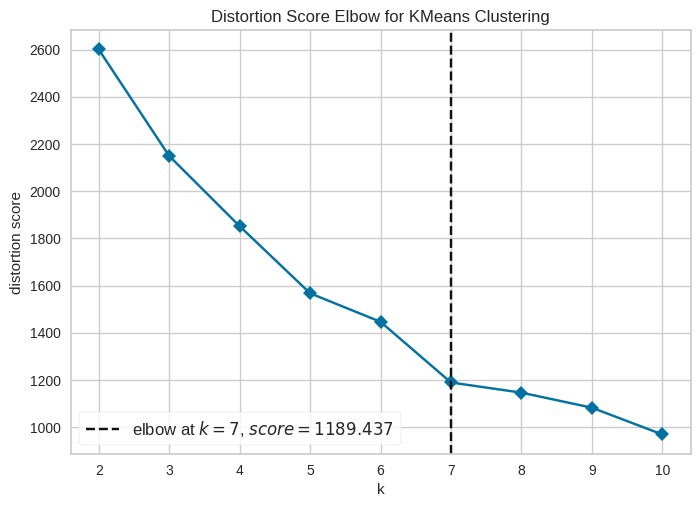

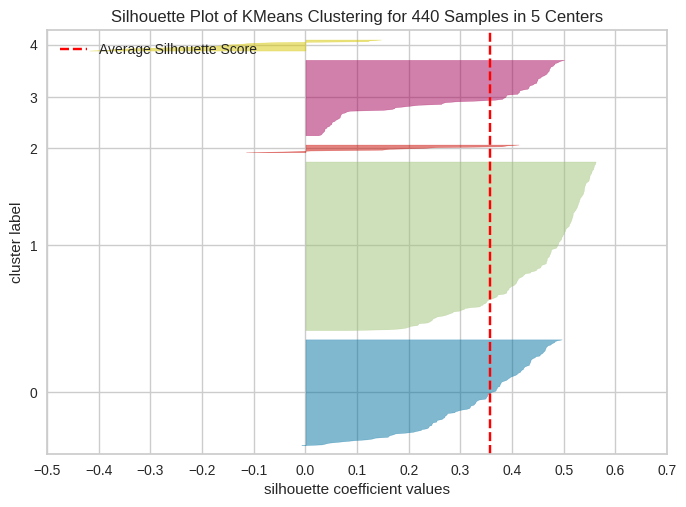

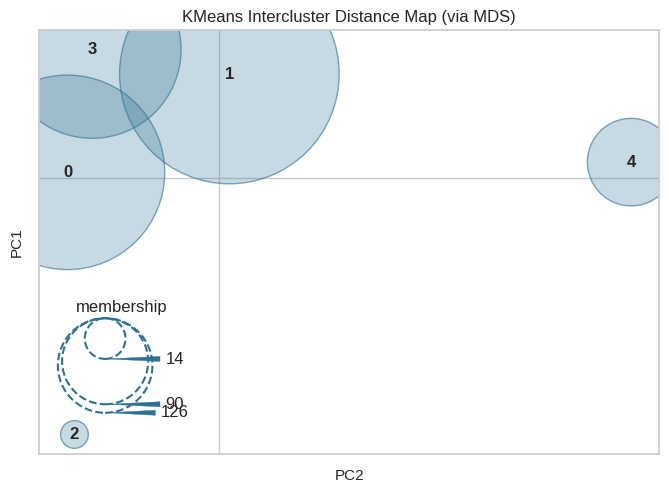

In [16]:
# quality / model-selection views
plot_model(kmeans_k5, plot='elbow')
plot_model(kmeans_k5, plot='silhouette')
plot_model(kmeans_k5, plot='distance')

# cluster visualization
plot_model(kmeans_k5, plot='cluster')
plot_model(kmeans_k5, plot='tsne')

# feature-wise distributions per cluster
plot_model(kmeans_k5, plot='distribution')


Trying other algorithms

Overall silhouette score: -0.03303168624738292


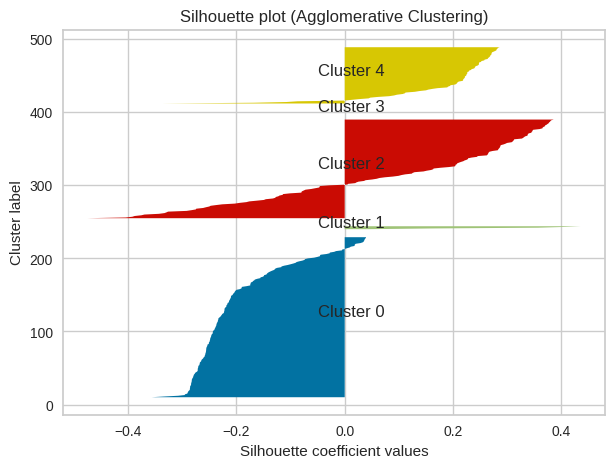

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# assign clusters with PyCaret
clustered = assign_model(hclust)
X = num_df.values
labels = clustered['Cluster'].values

sil_score = silhouette_score(X, labels)
print("Overall silhouette score:", sil_score)

sample_sil = silhouette_samples(X, labels)
plt.figure(figsize=(7,5))
y_lower = 10
for i in np.unique(labels):
    ith_cluster_sil = sample_sil[labels == i]
    ith_cluster_sil.sort()
    size_i = ith_cluster_sil.shape[0]
    y_upper = y_lower + size_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil)
    plt.text(-0.05, y_lower + 0.5 * size_i, str(i))
    y_lower = y_upper + 10
plt.title("Silhouette plot (Agglomerative Clustering)")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3570,135.4684,1.1515,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

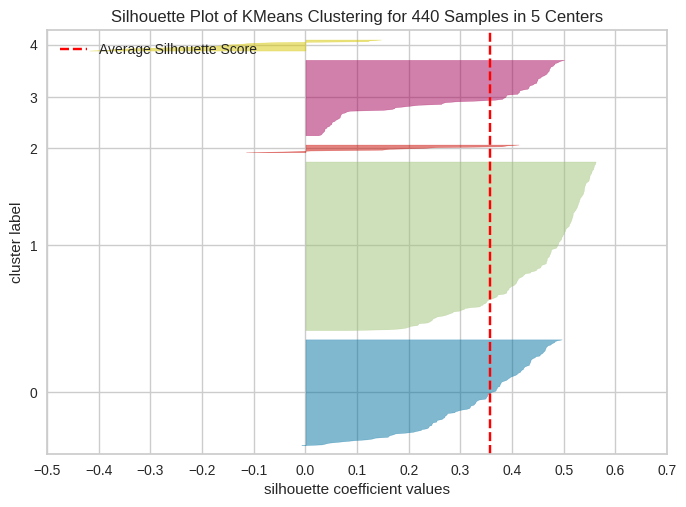

In [22]:
kmeans = create_model('kmeans', num_clusters=5)
plot_model(kmeans, plot='silhouette')



In [23]:
dbs = create_model('dbscan')
opt = create_model('optics')
plot_model(dbs, plot='tsne')
plot_model(opt, plot='tsne')


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1310,12.4059,1.4950,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.3715,5.3337,1.3836,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Hyperparameter tuning

In [25]:
from pycaret.clustering import *
from sklearn.metrics import silhouette_score

# Assume you've already run setup()
scores = {}
for k in range(2, 11):
    model = create_model('kmeans', num_clusters=k)
    clustered = assign_model(model)
    labels = clustered['Cluster']
    X = get_config('X')  # get preprocessed data used in setup
    score = silhouette_score(X, labels)
    scores[k] = score
    print(f"k={k} → silhouette={score:.4f}")

best_k = max(scores, key=scores.get)
print(f"\nBest number of clusters by silhouette: k={best_k} (score={scores[best_k]:.4f})")

# Re-train final model
kmeans_best = create_model('kmeans', num_clusters=best_k)
plot_model(kmeans_best, plot='cluster')
plot_model(kmeans_best, plot='tsne')
plot_model(kmeans_best, plot='distribution')



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3742,154.8990,1.2809,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

k=2 → silhouette=0.2667


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3568,139.3494,1.1736,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

k=3 → silhouette=0.2086


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3482,130.9179,1.2359,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

k=4 → silhouette=0.0405


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3570,135.4684,1.1515,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

k=5 → silhouette=0.0458


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3559,124.4338,1.1557,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

k=6 → silhouette=0.0383


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3553,141.4021,1.0414,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

k=7 → silhouette=0.0522


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3563,127.7793,1.0546,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

k=8 → silhouette=0.0642


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3589,121.2894,1.0553,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

k=9 → silhouette=0.0126


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3681,125.7457,1.0440,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

k=10 → silhouette=0.0301

Best number of clusters by silhouette: k=2 (score=0.2667)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3742,154.8990,1.2809,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Assigning cluster labels & profile clusters

In [27]:
# PICK A FINAL CANDIDATE SAFELY
try:
    final_candidate
except NameError:
    # prefer tuned model if it exists, else fall back
    if 'kmeans_tuned' in globals():
        final_candidate = kmeans_tuned
    elif 'kmeans_k5' in globals():
        final_candidate = kmeans_k5
    elif 'kmeans' in globals():
        final_candidate = kmeans
    else:
        # last resort: build a simple kmeans with k=5
        final_candidate = create_model('kmeans', num_clusters=5)

# ASSIGN CLUSTER LABELS
clustered = assign_model(final_candidate)
display(clustered.head())

# CLUSTER SIZES
sizes = clustered['Cluster'].value_counts().sort_index()
print("Cluster sizes:\n", sizes)

# CLUSTER PROFILES (means per feature)
# keep only numeric feature columns that exist in clustered
feat_cols = [c for c in getattr(num_df, 'columns', clustered.columns)
             if c in clustered.columns and pd.api.types.is_numeric_dtype(clustered[c])]
profile = clustered.groupby('Cluster')[feat_cols].mean().round(2)
print("\nCluster profile (feature means):")
display(profile)



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,Cluster 0
1,2,3,7057,9810,9568,1762,3293,1776,Cluster 0
2,2,3,6353,8808,7684,2405,3516,7844,Cluster 0
3,1,3,13265,1196,4221,6404,507,1788,Cluster 1
4,2,3,22615,5410,7198,3915,1777,5185,Cluster 0


Cluster sizes:
 Cluster
Cluster 0    126
Cluster 1    200
Cluster 2     10
Cluster 3     90
Cluster 4     14
Name: count, dtype: int64

Cluster profile (feature means):


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
Cluster 0,2.00,2.67,8130.03,8874.07,14139.15,1339.48,6104.94,1542.71
Cluster 1,1.00,3.00,11941.28,3060.57,3497.94,2950.78,755.69,1101.20
Cluster 2,2.00,2.50,15964.90,34708.50,48536.90,3054.60,24875.20,2942.80
Cluster 3,1.06,1.31,11979.06,3210.78,4122.41,3288.78,861.34,1130.76
Cluster 4,1.07,2.79,44980.43,13146.79,11504.00,19013.14,1516.00,8937.64


Visual inspection (only supported plots) + export

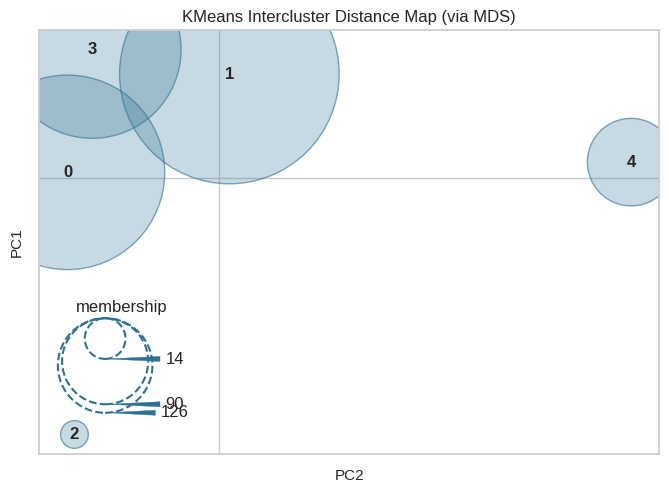

Saved: wholesale_customers_clustered.csv


In [28]:
# 2D/3D cluster views (supported in your build)
plot_model(final_candidate, plot='tsne')        # TSNE-based cluster view
plot_model(final_candidate, plot='cluster')     # another TSNE 3D cluster view

# Distance map (only for some models; hclust usually works)
try:
    plot_model(final_candidate, plot='distance')
except Exception as e:
    print("distance plot not supported for this model:", e)

# Feature-wise distributions per cluster
plot_model(final_candidate, plot='distribution')

# EXPORT LABELED DATA
clustered.to_csv("wholesale_customers_clustered.csv", index=False)
print("Saved: wholesale_customers_clustered.csv")


Saving the pipeline (preprocessing + estimator)

In [29]:
save_path = "wholesale_kmeans_pipeline"
save_model(final_candidate, save_path)
print(f"Saved pipeline as: {save_path}")


Transformation Pipeline and Model Successfully Saved
Saved pipeline as: wholesale_kmeans_pipeline


Manual PCA (works even when PyCaret lacks a 'pca' plot)

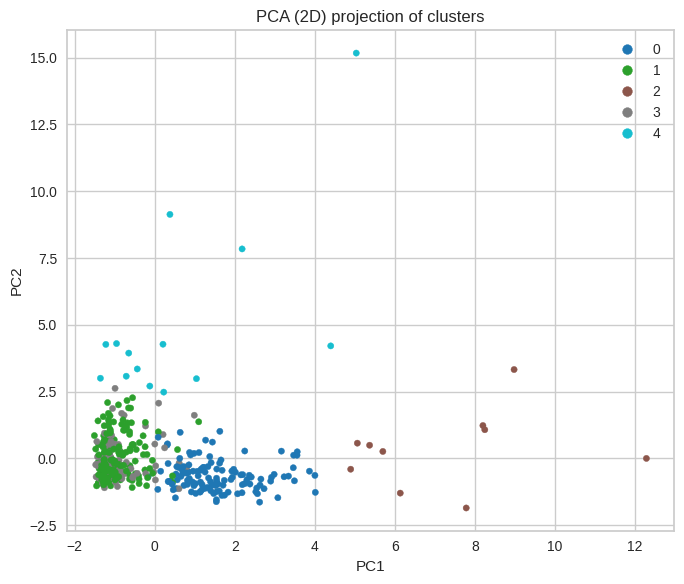

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

feat_cols = [c for c in getattr(num_df, 'columns', clustered.columns)
             if c in clustered.columns and pd.api.types.is_numeric_dtype(clustered[c])]
X = clustered[feat_cols].to_numpy()
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

labels = clustered['Cluster']
if labels.dtype == 'O':
    labels = labels.str.extract(r'(\d+)').astype(int).squeeze()

plt.figure(figsize=(7,6))
sc = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=20, cmap='tab10')
plt.title('PCA (2D) projection of clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

handles, texts = sc.legend_elements()
plt.legend(handles, texts, loc='best')

plt.tight_layout()
plt.show()

